Oncology Data 

In [69]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

In [70]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.nanmean(any_numbers))/np.nanstd(any_numbers)  

def correlation(t, x, y):
    return np.nanmean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.nanstd(table.column(y))/np.nanstd(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.nanmean(table.column(y)) - a * np.nanmean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [71]:
oncology = Table.read_table("https://gist.githubusercontent.com/caterinaponti/08485044a1ba5b5c93000d1875ecacba/raw/75329a5a80ff4779bc1417a1c4a0f440a8459305/OncologyData.csv")
oncology

patient_id,DiagPeriodL90D,patient_age,education_bachelors,income_individual_median,home_value,commute_time,health_uninsured,widowed,education_less_highschool,patient_state,Region,bmi,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,payer_type,labor_force_participation,rent_median,self_employed,poverty,limited_english,Ozone,unemployment_rate,home_ownership
136034,1,18,8.71562,25924.1,197792,25.1345,9.23906,6.31692,31.8016,CA,West,nan,C50512,C773,MEDICAID,53.0323,958.962,8.71818,24.6828,19.4143,46.2723,13.2548,56.9048
771254,1,18,19.5875,37083.1,270143,32.219,13.6484,6.29531,11.1703,TX,South,nan,C50911,C7951,MEDICAID,59.7578,1198.42,15.9897,11.3375,2.66667,38.8133,4.20159,78.7032
804476,1,18,18.4667,39613.5,706269,23.687,8.32174,5.2625,19.8708,CA,West,nan,C50912,C7951,nan,60.6833,1693.76,12.7304,11.5087,8.86364,39.139,5.59583,54.7091
145956,1,18,26.8051,49607.1,979491,29.1789,5.38974,4.7359,10.7077,CA,West,nan,C50911,C7951,nan,63.4872,2120.57,15.4297,7.11316,6.10263,35.5561,4.94359,64.0132
852632,1,18,26.8051,49607.1,979491,29.1789,5.38974,4.7359,10.7077,CA,West,nan,C50911,C7951,nan,63.4872,2120.57,15.4297,7.11316,6.10263,35.5561,4.94359,64.0132
770746,1,18,26.0784,42477.5,706914,31.8243,6.56216,4.76757,12.2486,CA,West,26,C50912,C773,COMMERCIAL,64.2162,2091,19.0583,9.22222,7.65833,44.9766,6.60541,64.5917
477671,1,18,26.0784,42477.5,706914,31.8243,6.56216,4.76757,12.2486,CA,West,nan,C50312,C773,MEDICAID,64.2162,2091,19.0583,9.22222,7.65833,44.9766,6.60541,64.5917
504882,1,18,23.4037,35116.9,279388,24.9519,11.7593,4.54444,10.8444,FL,South,nan,C50919,C7931,MEDICAID,65.9926,1362.31,13.4231,18.4704,11.7778,37.2286,5.48889,48.1444
554898,1,19,15.7575,32391.7,394185,31.7529,6.1575,5.25,14.865,CA,West,nan,C50911,C786,nan,53.135,1318.91,12.3421,15.9462,5.85385,42.9858,10.4575,63.7462
981182,1,19,13.1444,25997.5,109634,25.0139,7.5,6.46111,16.125,MI,Midwest,40,C50919,C787,nan,55.9917,929.083,14.8972,28.7917,2.74722,38.4327,13.1667,51.1222


In [148]:
correlation(oncology, 'education_bachelors', 'health_uninsured')

-0.23540534477580913

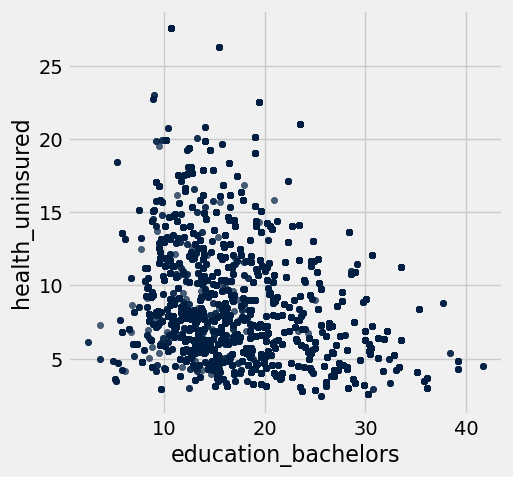

In [73]:
oncology.scatter('education_bachelors', 'health_uninsured')

In [7]:
oncology_education_and_health = oncology.select('education_bachelors', 'health_uninsured').sample(1000)
oncology_education_and_health

education_bachelors,health_uninsured
12.8603,6.27241
25.3286,8.40536
14.5561,19.25
23.1028,6.3169
20.9296,4.05185
15.8911,12.8464
24.5706,4.25735
18.6265,8.29688
23.3814,7.64762
23.1028,6.3169


In [8]:
def predict_health(education_value):
    """Return a prediction of the health uninsured value based on the education bachelor."""
    close_points = oncology_education_and_health.where('education_bachelors', are.between(education_value-0.5, education_value + 0.5))
    return np.nanmean(close_points.column('health_uninsured'))

In [10]:
oncology_education_and_health = oncology_education_and_health.with_column(
    'Prediction', oncology_education_and_health.apply(predict_health, 'education_bachelors')
)
oncology_education_and_health

education_bachelors,health_uninsured,Prediction
12.8603,6.27241,8.52211
25.3286,8.40536,8.7498
14.5561,19.25,9.66495
23.1028,6.3169,8.82464
20.9296,4.05185,7.68051
15.8911,12.8464,9.12316
24.5706,4.25735,7.35396
18.6265,8.29688,8.72681
23.3814,7.64762,8.21079
23.1028,6.3169,8.82464


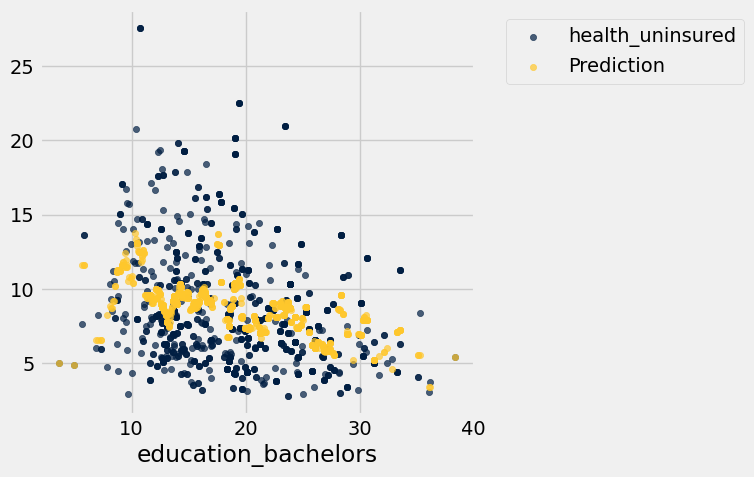

In [25]:
oncology_education_and_health.scatter('education_bachelors')

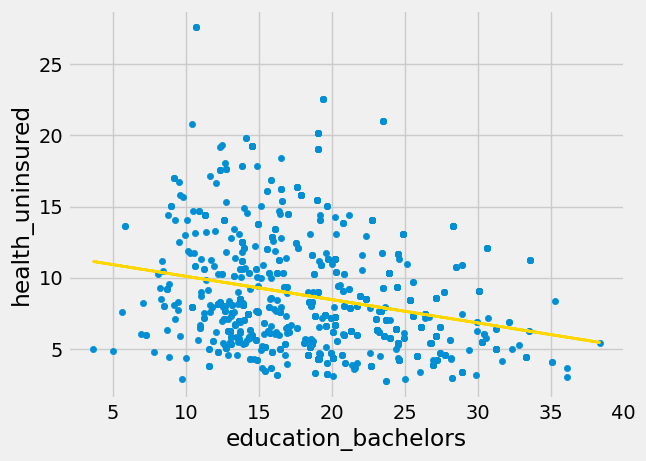

In [27]:
#Linear regression model to describe relationship between the education_bachelors and the health_uninsured varible
scatter_fit(oncology_education_and_health, 'education_bachelors', 'health_uninsured')

In [12]:
correlation(oncology, 'education_less_highschool', 'income_individual_median')

-0.45680794601782704

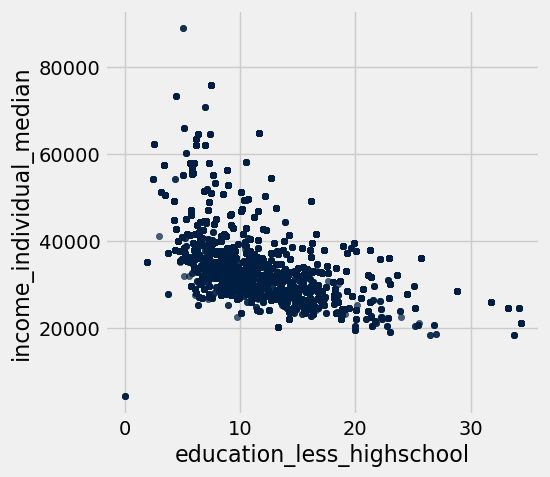

In [23]:
oncology.scatter('education_less_highschool', 'income_individual_median')

In [14]:
#make a sample of 1000 values of the two variables education_less_highschool and income_individual_median
oncology_education_and_income = oncology.select('education_less_highschool', 'income_individual_median').sample

In [18]:
def predict_income(education_less_highschool):
    """Return a prediction of the income value based on the education less than high school value."""
    close_points = oncology_education_and_income.where('education_less_highschool', are.between(education_less_highschool-0.5, education_less_highschool + 0.5))
    return np.nanmean(close_points.column('income_individual_median'))

In [19]:

oncology_education_and_income = oncology_education_and_income.with_column(
    'Prediction', oncology_education_and_income.apply(predict_income, 'education_less_highschool')
)
oncology_education_and_income

education_less_highschool,income_individual_median,Prediction
31.8016,25924.1,25924.1
24.512,27712.4,27712.4
12.78,37098.7,33600.4
11.5324,36059.9,36851.5
25.1667,24644.1,22695.1
22.9154,36053.4,33664.8
15.021,33791.4,32217.9
5.87531,39455.2,45441.6
16.125,25997.5,33207.3
12.9333,30793,33579.2


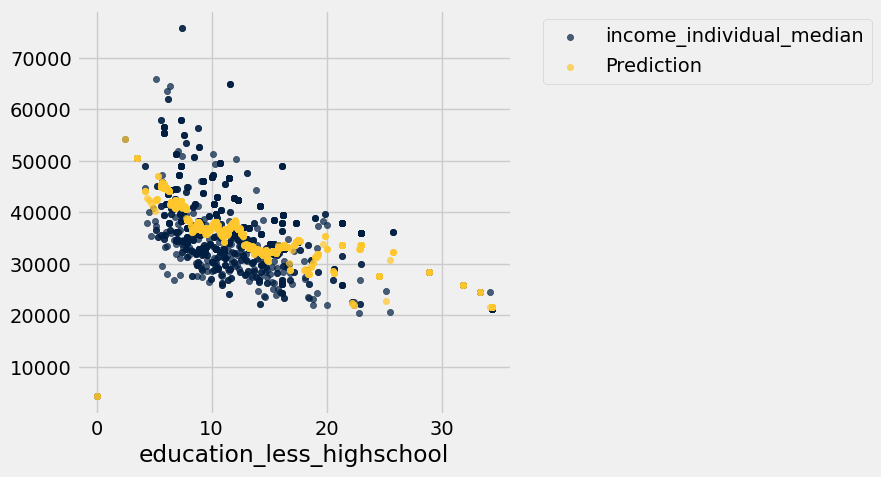

In [20]:
oncology_education_and_income.scatter('education_less_highschool')

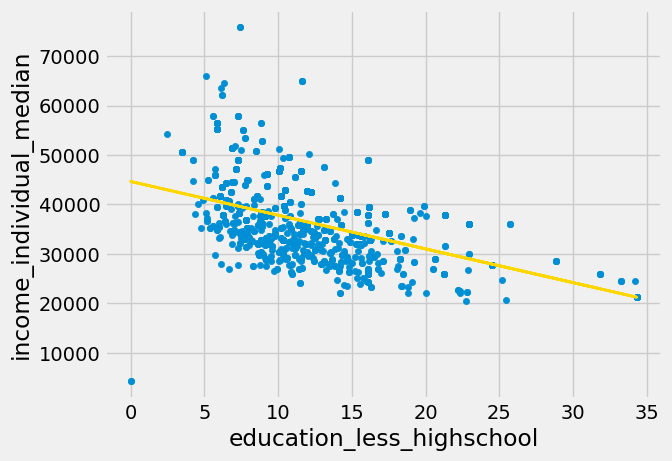

In [21]:
#Linear regression model to describe relationship between the education_less_highschool and the income_individual_median varible
scatter_fit(oncology_education_and_income, 'education_less_highschool', 'income_individual_median')


In [34]:
#make a sample of 1000 values of the two variables education_less_highschool and income_individual_median
oncology_poverty_and_health = oncology.select('poverty', 'health_uninsured').sample(500)
oncology_poverty_and_health

poverty,health_uninsured
26.4737,6.945
12.181,9.35
11.2978,6.28
5.62105,4.21538
18.7292,22.5448
9.22222,6.56216
5.97963,4.07778
26.18,9.05
15.4095,8.7619
14.6429,15.0214


In [35]:
def predict_insurance(poverty):
    """Return a prediction of the percentage of health uninsured based on the poverty percentage (The median value of owner occupied homes)."""
    close_points = oncology_poverty_and_health.where('poverty', are.between(poverty-0.5, poverty + 0.5))
    return np.nanmean(close_points.column('health_uninsured'))

In [36]:
oncology_with_predictions = oncology_poverty_and_health.with_column(
    'Prediction', oncology_poverty_and_health.apply(predict_insurance, 'poverty')
    )
oncology_with_predictions

poverty,health_uninsured,Prediction
26.4737,6.945,8.52375
12.181,9.35,8.87372
11.2978,6.28,8.05579
5.62105,4.21538,4.12908
18.7292,22.5448,12.7144
9.22222,6.56216,7.07222
5.97963,4.07778,4.00863
26.18,9.05,8.52375
15.4095,8.7619,9.56222
14.6429,15.0214,9.13026


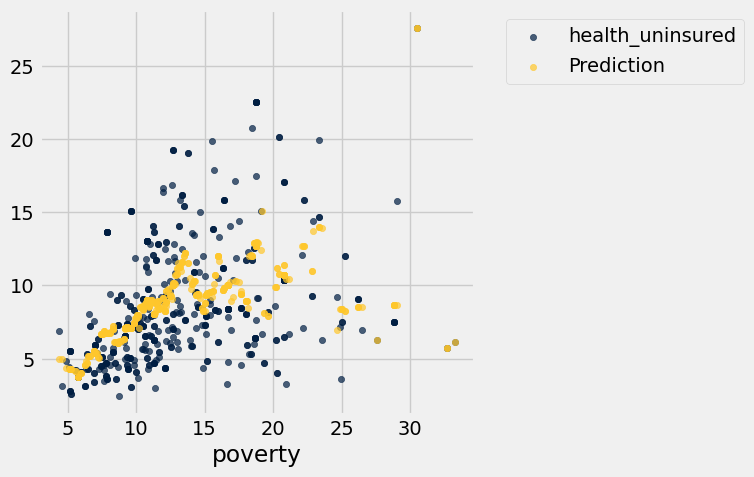

In [37]:
oncology_with_predictions.scatter('poverty')

In [38]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz) 

In [39]:
oncology_SU = Table().with_columns(
    'Poverty SU', standard_units(oncology_poverty_and_health.column('poverty')),
    'Health Uninsured SU', standard_units(oncology_poverty_and_health.column('health_uninsured'))
)
oncology_SU

Poverty SU,Health Uninsured SU
2.43369,-0.40101
-0.192154,0.153468
-0.35441,-0.554328
-1.39733,-1.03033
1.01088,3.19556
-0.735729,-0.489275
-1.33146,-1.06206
2.37974,0.0843027
0.400996,0.0178816
0.260144,1.46103


In [41]:
family_slope = slope(oncology_poverty_and_health, 'poverty', 'health_uninsured')
family_intercept = intercept(oncology_poverty_and_health, 'poverty', 'health_uninsured')
family_slope, family_intercept

(0.29385079936281749, 4.797619404603771)

In [42]:
oncology_with_predictions = oncology_with_predictions.with_column(
    'Regression Prediction', family_slope * oncology_poverty_and_health.column('poverty') + family_intercept
)
oncology_with_predictions

poverty,health_uninsured,Prediction,Regression Prediction
26.4737,6.945,8.52375,12.5769
12.181,9.35,8.87372,8.377
11.2978,6.28,8.05579,8.11748
5.62105,4.21538,4.12908,6.44937
18.7292,22.5448,12.7144,10.3012
9.22222,6.56216,7.07222,7.50758
5.97963,4.07778,4.00863,6.55474
26.18,9.05,8.52375,12.4906
15.4095,8.7619,9.56222,9.32572
14.6429,15.0214,9.13026,9.10043


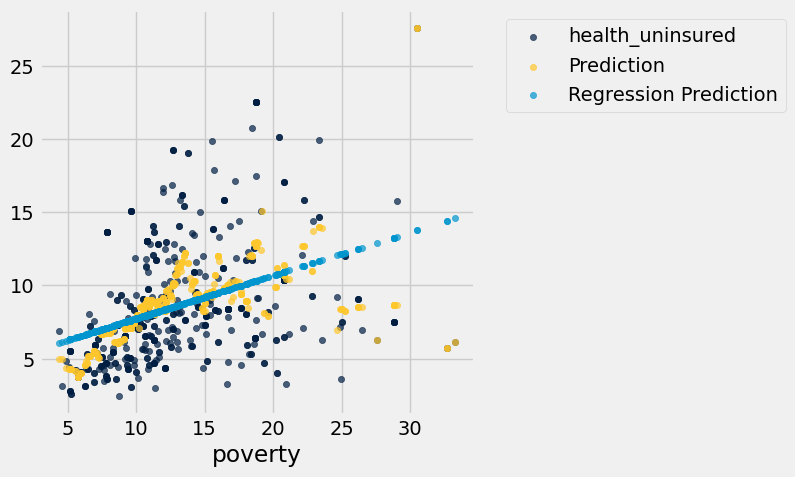

In [44]:
oncology_with_predictions.scatter('poverty')

In [45]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

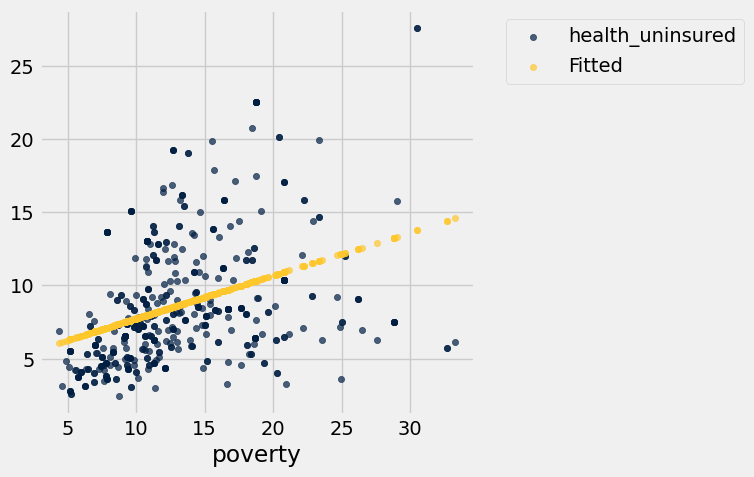

In [46]:
oncology_poverty_and_health.with_column('Fitted', fit(oncology_poverty_and_health, 'poverty', 'health_uninsured')).scatter('poverty')

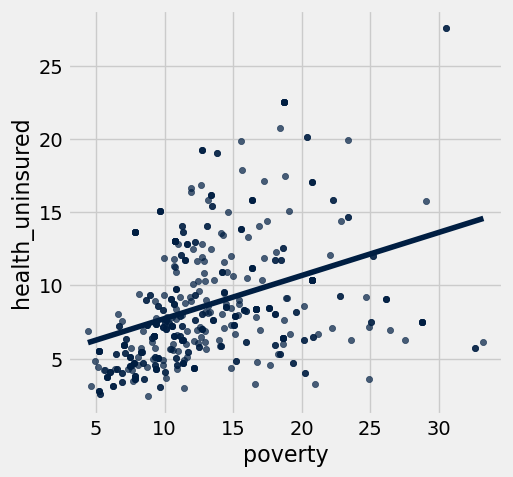

In [48]:
oncology_poverty_and_health.scatter('poverty', fit_line=True)

In [49]:
#Estimate error of predictions
actual = oncology_with_predictions.column('health_uninsured')
predicted = oncology_with_predictions.column('Prediction')
errors = actual - predicted

In [50]:
oncology_with_predictions.with_column('Error', errors)

poverty,health_uninsured,Prediction,Regression Prediction,Error
26.4737,6.945,8.52375,12.5769,-1.57875
12.181,9.35,8.87372,8.377,0.476279
11.2978,6.28,8.05579,8.11748,-1.77579
5.62105,4.21538,4.12908,6.44937,0.0863022
18.7292,22.5448,12.7144,10.3012,9.83044
9.22222,6.56216,7.07222,7.50758,-0.510057
5.97963,4.07778,4.00863,6.55474,0.0691503
26.18,9.05,8.52375,12.4906,0.52625
15.4095,8.7619,9.56222,9.32572,-0.800317
14.6429,15.0214,9.13026,9.10043,5.89117


In [52]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

In [63]:
oncology_poverty_and_health = oncology_poverty_and_health.with_columns(
        'Fitted Value', fit(oncology_poverty_and_health, 'poverty', 'health_uninsured'),
        'Residual', residual(oncology_poverty_and_health, 'poverty', 'health_uninsured')
    )
oncology_poverty_and_health

poverty,health_uninsured,Fitted Value,Residual
26.4737,6.945,12.5769,-5.63193
12.181,9.35,8.377,0.972998
11.2978,6.28,8.11748,-1.83748
5.62105,4.21538,6.44937,-2.23399
18.7292,22.5448,10.3012,12.2436
9.22222,6.56216,7.50758,-0.945415
5.97963,4.07778,6.55474,-2.47696
26.18,9.05,12.4906,-3.44063
15.4095,8.7619,9.32572,-0.563816
14.6429,15.0214,9.10043,5.92099


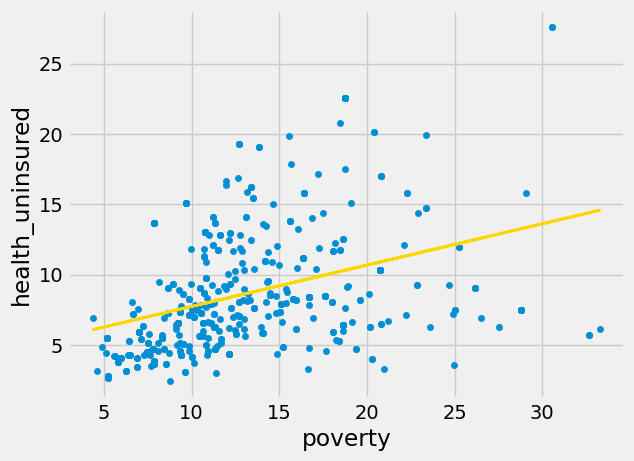

In [64]:
scatter_fit(oncology_poverty_and_health, 'poverty', 'health_uninsured')

In [65]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

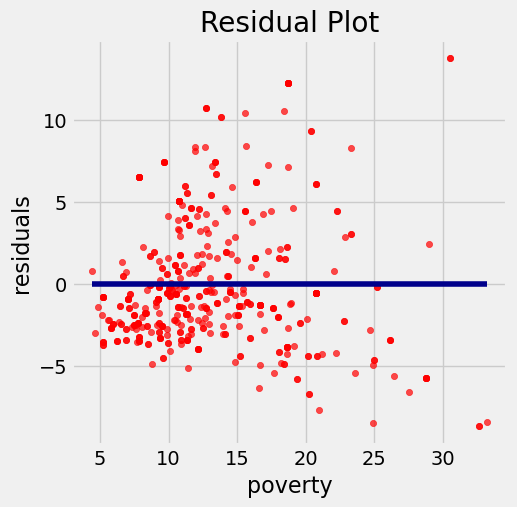

In [66]:
#The poverty values are on the horizontal axis, as in the original scatter plot. But now the vertical axis shows the residuals. 
residual_plot(oncology_poverty_and_health, 'poverty', 'health_uninsured')

Slope of regression line: 0.293850799363
Approximate 95%-confidence interval for the true slope:
0.212796011824 0.386854793873


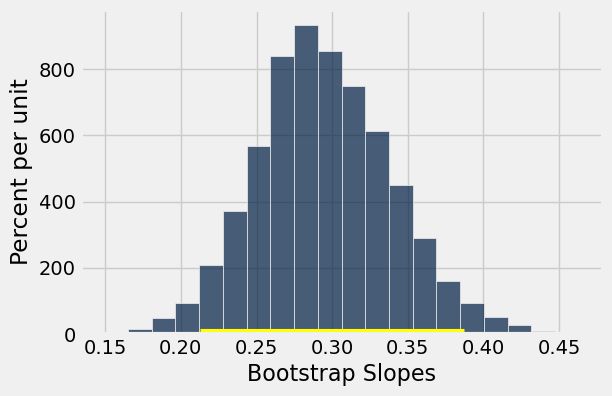

In [93]:
slopes = make_array()

# For each repetition:
# Bootstrap the scatter, get the slope of the regression line,
# augment the list of generated slopes
for i in np.arange(5000):
    bootstrap_sample = oncology_poverty_and_health.sample()
    bootstrap_slope = slope(bootstrap_sample, 'poverty', 'health_uninsured')
    slopes = np.append(slopes, bootstrap_slope)

# Find the endpoints of the 95% confidence interval for the true slope
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)

Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

# Slope of the regression line from the original sample
observed_slope = slope(oncology_poverty_and_health,'poverty', 'health_uninsured')

# Display results
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
print('Slope of regression line:', observed_slope)
print('Approximate 95%-confidence interval for the true slope:')
print(left, right)

In [78]:
correlation(oncology, 'unemployment_rate', 'education_less_highschool')

0.4941609461997577

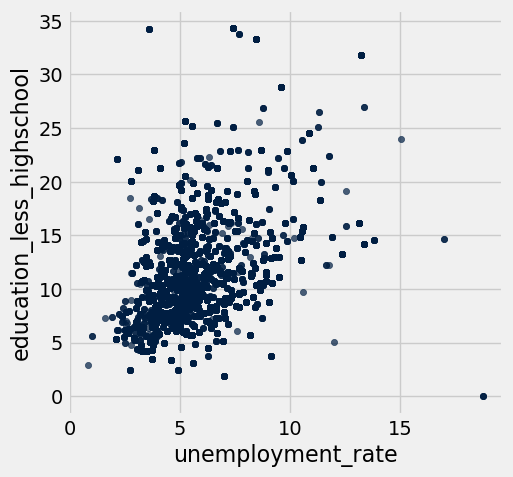

In [82]:
oncology.scatter('unemployment_rate', 'education_less_highschool')

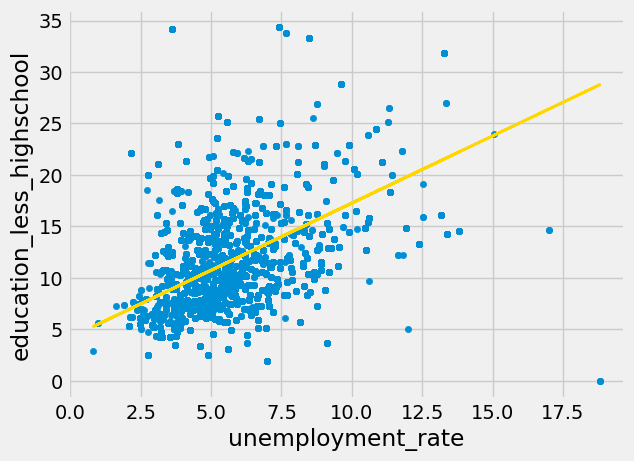

In [80]:
scatter_fit(oncology, 'unemployment_rate', 'education_less_highschool')

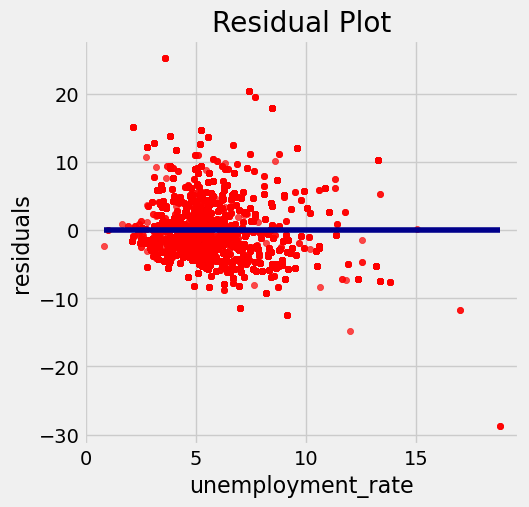

In [84]:
residual_plot(oncology, 'unemployment_rate', 'education_less_highschool')

In [85]:
oncology_education_and_unemployement = oncology.select('unemployment_rate', 'education_less_highschool').sample(2000)

In [88]:
def predict_unemployement(education_less_highschool):
    """Return a prediction of the unemployement rate value based on the education less than highschool value."""
    close_points = oncology_education_and_unemployement.where('education_less_highschool', are.between(education_less_highschool-1, education_less_highschool + 1))
    return np.nanmean(close_points.column('unemployment_rate'))

In [89]:
oncology_with_predictions = oncology_education_and_unemployement.with_column(
    'Prediction', oncology_education_and_unemployement.apply(predict_unemployement, 'unemployment_rate')
    )
oncology_with_predictions

unemployment_rate,education_less_highschool,Prediction
8.05,14.52,5.16538
5.3321,8.91605,4.33096
13.2548,31.8016,6.12369
5.775,18.9479,4.36745
7.70769,8.30909,4.99911
4.06471,7.43235,4.54982
6.29107,7.01607,4.50189
3.66604,5.08491,4.71025
9.13529,12.9235,5.60508
4.86154,7.45641,4.43955


Classification - diagnosis within 90 days yes or not based on two variables

In [112]:
oncology = oncology.sample(2000)

In [113]:
color_table = Table().with_columns(
    'DiagPeriodL90D', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
oncology = oncology.join('DiagPeriodL90D', color_table)

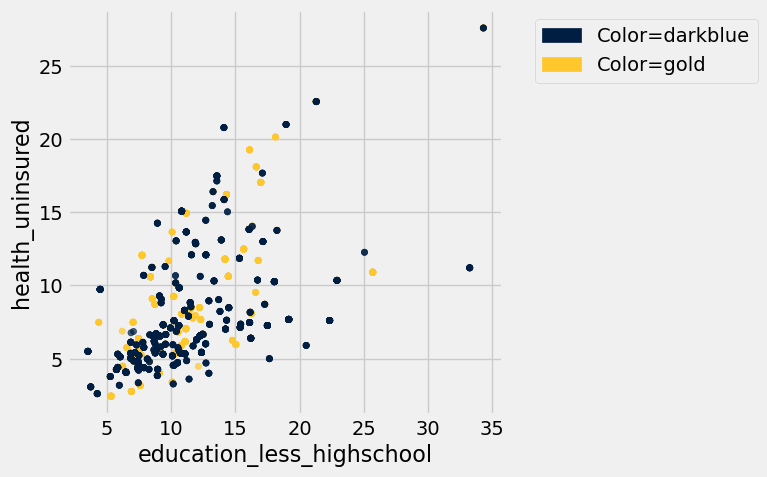

In [115]:
oncology.scatter('education_less_highschool', 'health_uninsured', group='Color')

In [144]:
shuffled_oncology = oncology.sample(with_replacement=False)
training = shuffled_oncology.take(np.arange(1000))
testing = shuffled_oncology.take(np.arange(1000, 2000))

In [145]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [146]:
attributes = training.select('education_less_highschool', 'health_uninsured')


In [147]:
distance(np.array(attributes.row(0)), np.array(attributes.row(1)))

6.4314700443119133